In [1]:
import numpy as np
import ROOT as rt
from larcv import larcv
from larlitecv import larlitecv
import cv2
print "OpenCV Version: ",cv2.__version__
from matplotlib import pyplot as plt
%matplotlib inline

Welcome to JupyROOT 6.08/06
OpenCV Version:  3.2.0


## Set Inputs

In [2]:
cfg_file = "/Users/barnchri/dllee_unified/larlitecv/app/TaggerCROI/bin/tagger.cfg"
flist_larcv="/Users/barnchri/dllee_unified/larlitecv/app/TaggerCROI/bin/input_larcv_flist.txt"
flist_larlite="/Users/barnchri/dllee_unified/larlitecv/app/TaggerCROI/bin/input_larlite_flist.txt"

In [3]:
tagger = larlitecv.CosmicTagger( cfg_file, flist_larcv, flist_larlite )

ThruMuPassConfig0: runradial=1 runlinear=1 runastar=0
ThruMuPassConfig1: runradial=1 runlinear=1 runastar=0
ThruMuPassConfig2: runradial=1 runlinear=1 runastar=1
ThruMuPassConfig3: runradial=1 runlinear=1 runastar=1
ThruMuPassConfig4: runradial=0 runlinear=1 runastar=1
TaggerFlashMatchAlgo : {
  BBoxPadcm : 20.0
  BeamTickRange : [100, 400]
  CosmicDiscFudgeFactor : 16666.5
  FVCutX : [-10, 270.0]
  FVCutY : [-130.0, 130.0]
  FVCutZ : [-10.0, 1045.0]
  FlashMatchChi2Cut : 100.0
  FlashPEThreshold : 10.0
  FudgeFactor : 33333.0
  MeV_per_cm : 2.3
  PMTFlashThreshold : 3.0
  QClusterStepSize : 0.3
  ShapeOnlyFit : true
  TotalPESigmaCut : 3.0
  UseGaus2D : false
  Verbosity : 2
  DetectorConfiguration : {
    DriftVelocity : 0.1114359
    ActiveVolume : {
      X : [0.0,256.35]
      Y : [-116.5,116.5]
      Z : [0.0,1036.8]
    }

    PMTPosition : {
      X : [-11.6415,-11.8345,-11.4175,-12.1765,-11.4545,-11.7755,-12.0585,-12.5405,-12.6615,-12.3045,-12.6245,-12.6045,-12.6125,-12.8735,-

In [4]:
tagger.printState()

"CosmicTagger State:  Config'd [true] Input [false] ThruMu [false] StopMu [false] Untagged [false] CROI [false]"

In [5]:
tagger.setEntry(0)

In [6]:
processinput_ok = tagger.processInputImages()
print "Processed OK: ",processinput_ok
tagger.printState()

"CosmicTagger State:  Config'd [true] Input [true] ThruMu [false] StopMu [false] Untagged [false] CROI [false]"

--------------------
 Entry 0 : 10700 0 2
--------------------
EmptyChannelAlgo::findMissingBadChs
search for flash hits from simpleFlashBeam: 1 flashes
search for flash hits from simpleFlashCosmic: 31 flashes
Processed OK:  True


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  after removing the cwd from sys.path.


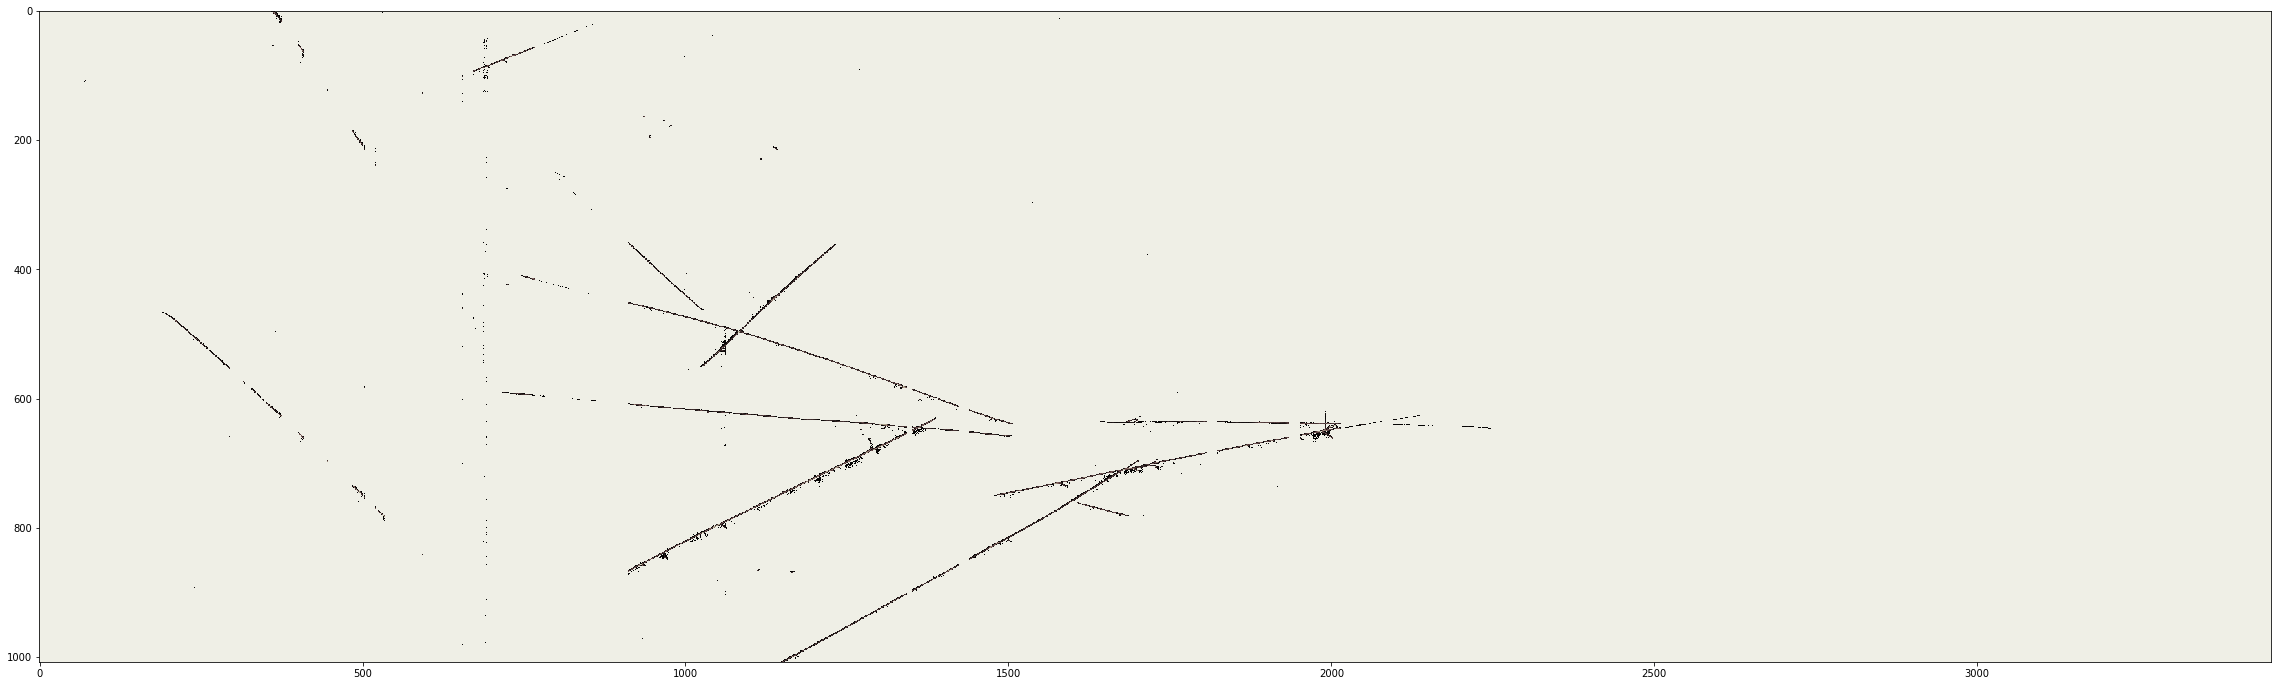

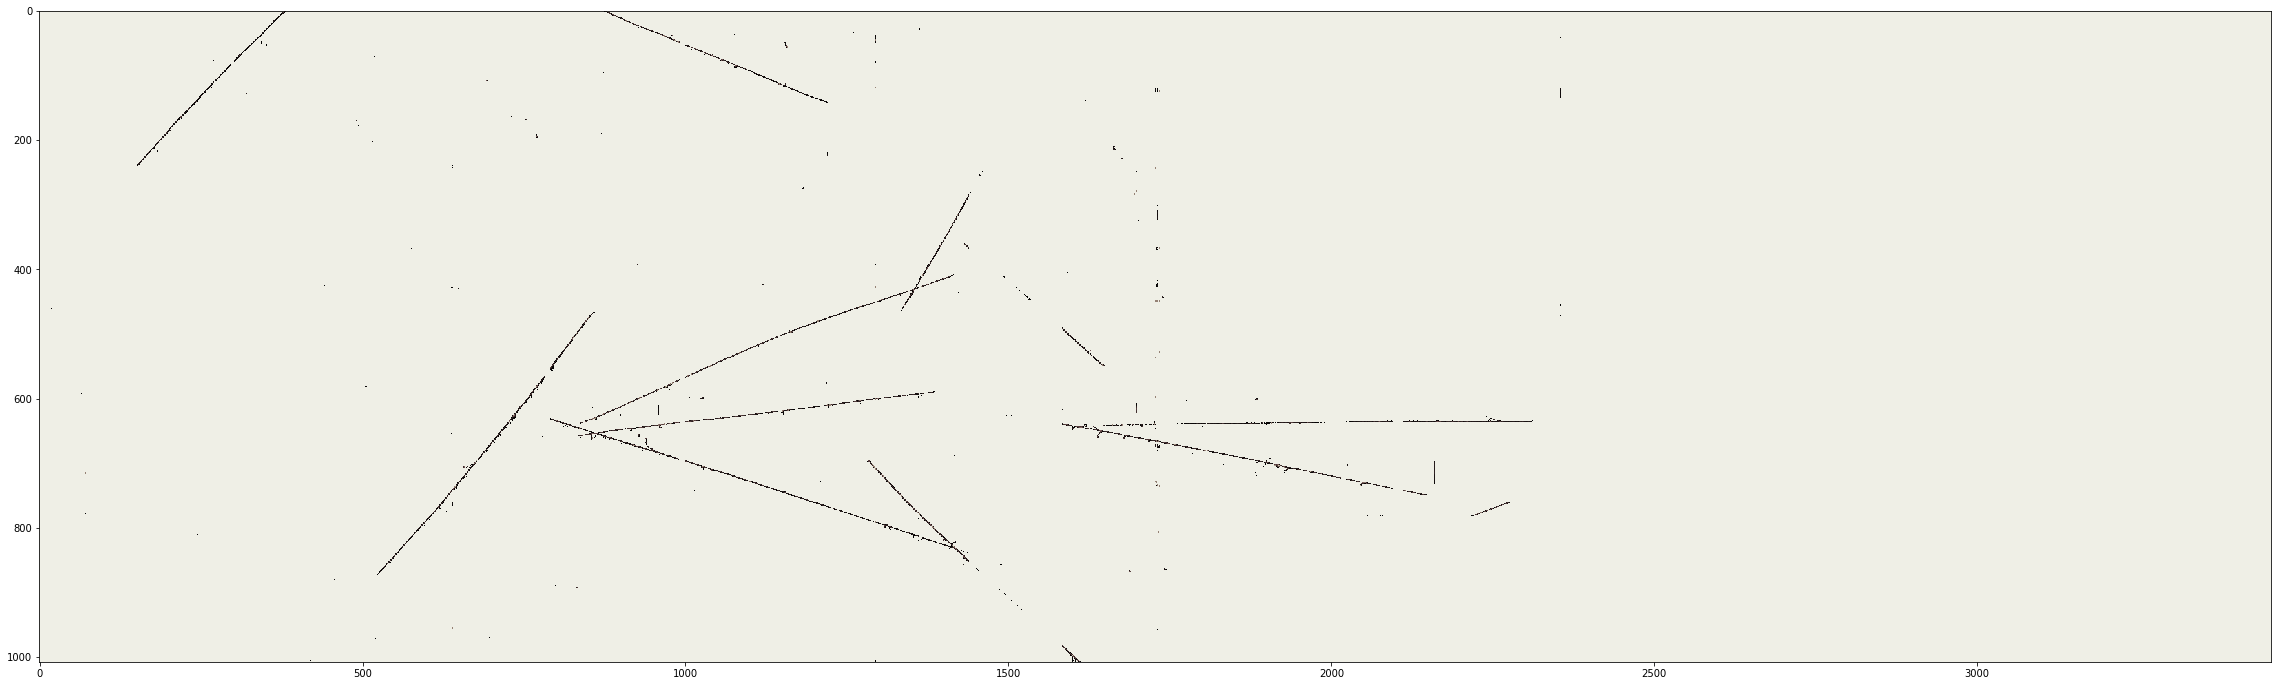

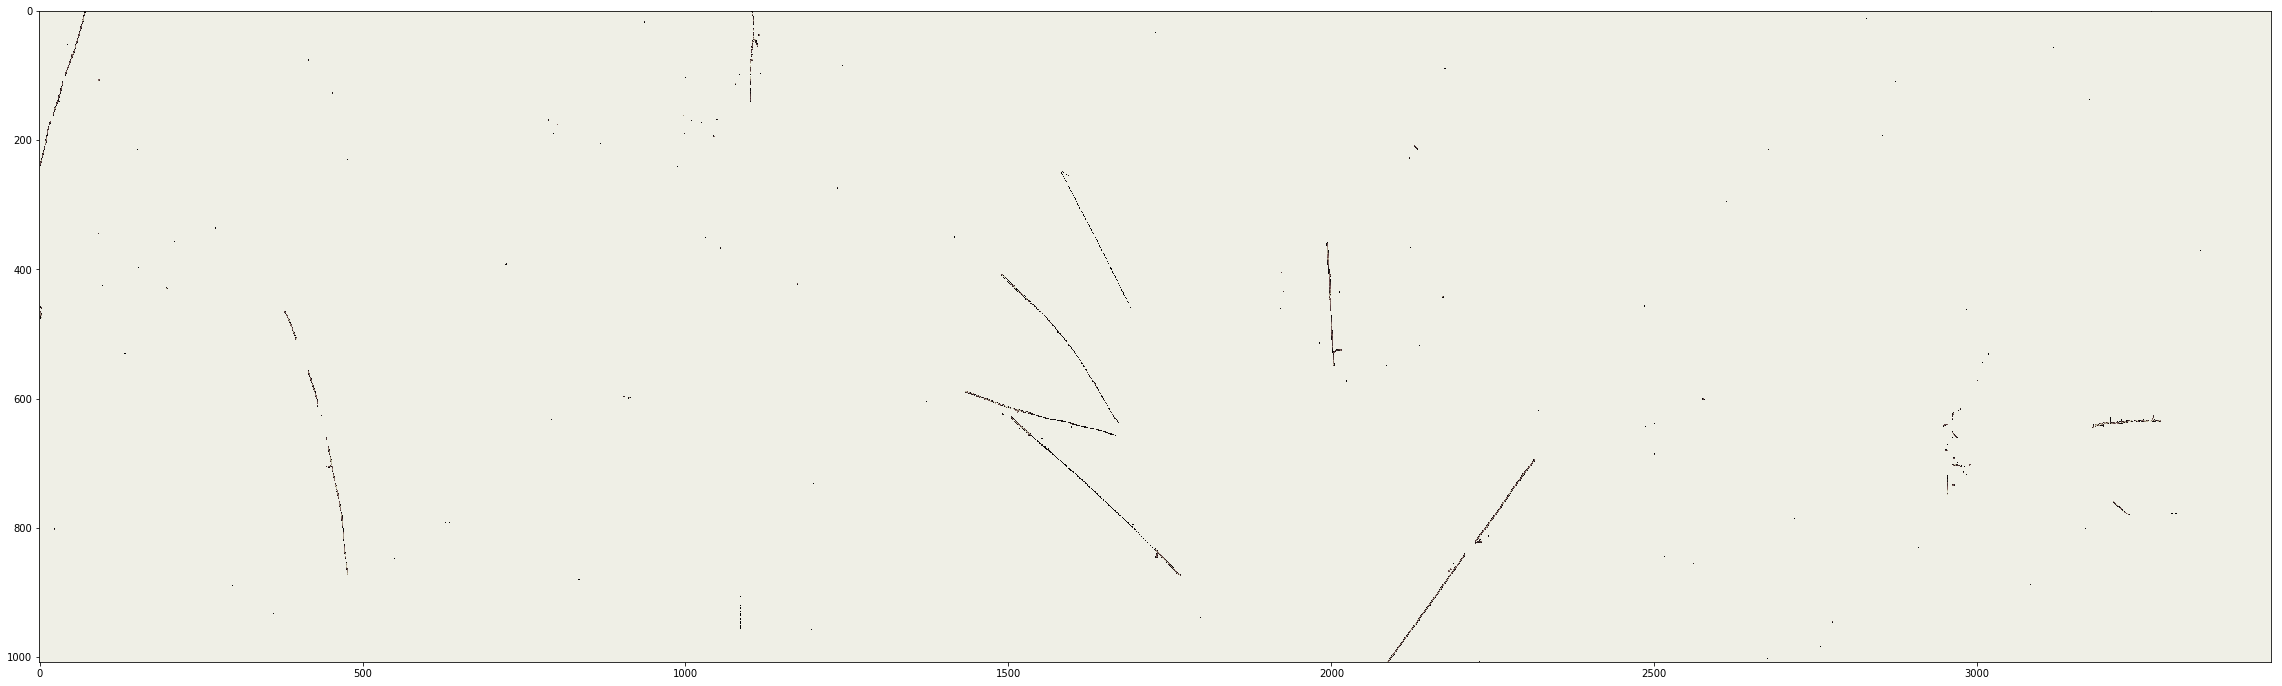

In [7]:
# Define Conversion of image2d to Plottable Input Images

def make_img( img2d, minval, maxval, colormap=cv2.COLORMAP_BONE ):
    img_np = np.transpose( larcv.as_ndarray( img2d ), (1,0) )
    img_np[ img_np<minval ] = 0
    img_np -= minval
    img_np[ img_np>maxval ] = maxval
    img_np /= 255.0/(maxval-minval)
    img_cv = cv2.cvtColor( img_np, cv2.COLOR_GRAY2BGR )
    img_cv = cv2.applyColorMap(img_cv.astype(np.uint8), colormap )
    return img_cv


inputdata = tagger.getInputData()
imgs = []
for p in range(inputdata.img_v.size()):
    img_cv = make_img( inputdata.img_v.at(p), 10, 500 )
    plt.figure(figsize=(40,40))
    plt.imshow( img_cv )


In [8]:
# RUN THRUMU
processthrumu_ok = tagger.findThruMu()
print "ThruMu: ",processthrumu_ok

BoundaryMuonTaggerAlgoConfig
 Pixel Thresholds: 10 10 10 
 Search Neighborhood: 10 10 10 
 Hit Search Uses BadChs: 1
 Boundary Cluster Min Pixels: 10 10 10 
 Boundary Cluster Radius: 10 10 10 
 Type Modifer: 1 1 0.5 0.5 
 Verbosity: 0
 Save Endpoint Images: 0
BoundaryMuonTaggerAlgo::searchforboundarypixels3D
Begin Boundary Pixel Search...
... hit search time: 1.85108 secs
Begin Clustering...
    [NORMAL]  <LoadData> Loading data for LArProperties...
     file=/Users/barnchri/dllee_unified/larlite/core/LArUtil/dat/larutil_microboone.root 
... clustering time: 1.21313 secs
boundary pixel search took 3.06432 secs
  hit collecting: 1.85108 secs
  clustering time: 1.21313 secs
  total number of combos found: 1643
 Side Tagger End Points: 20
   Top: 12
   Bottom: 7
   Upstream: 1
   Downstream: 0
    [NORMAL]  <LoadData> Loading data for Geometry...
     file=/Users/barnchri/dllee_unified/larlite/core/LArUtil/dat/larutil_microboone.root 
 Flash Tagger End Points: 11
  Anode: 6
  Cathode: 2
 

[ PLANE 2 ]
Side-tagger End points:  20
Anode-tagged End points:  6
Cathode-tagged End points:  2
End-tagged End points:  3


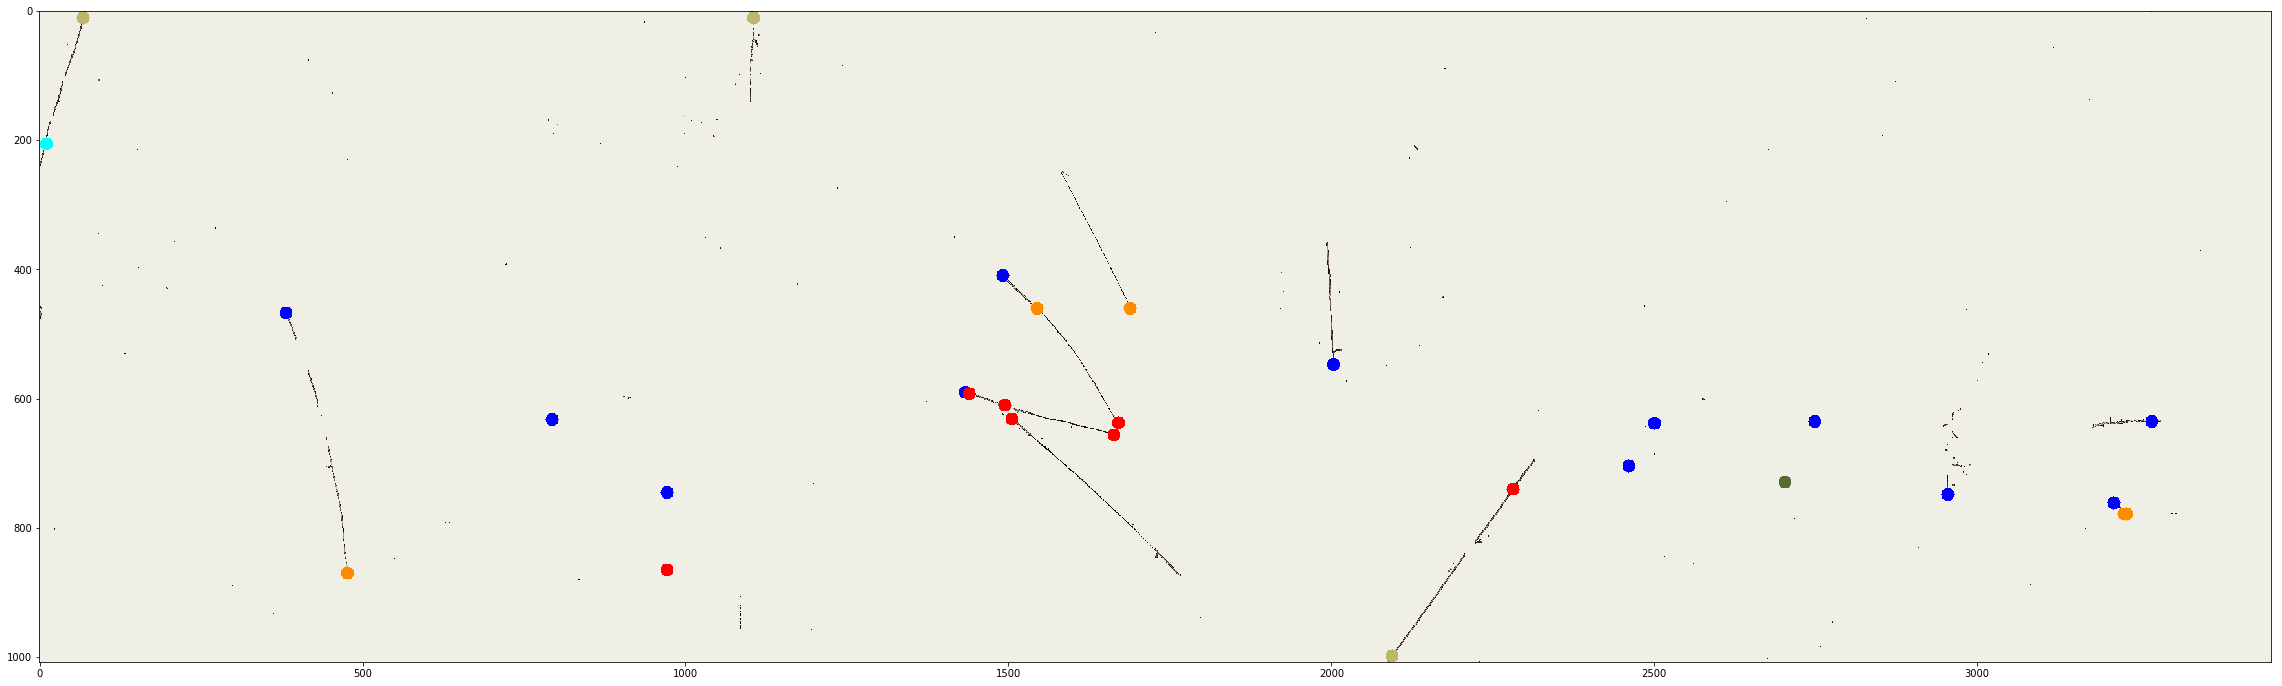

In [9]:
# End points
inputdata = tagger.getInputData()
thrumudata = tagger.getThruMuData()
minpix = 10.0
maxpix = 500.0

endtype_colors = {0:(0,0,255),   # top
                  1:(255,0,0),   # bot
                  2:(0,255,255), # upstream
                  3:(255,0,255), # downstream
                  }
for p in range(inputdata.img_v.size()):
    if p not in [2]:
        continue
    
    # mark end points
    print "[ PLANE %d ]"%(p)
    print "Side-tagger End points: ",thrumudata.side_spacepoint_v.size()
    for ipt in range(thrumudata.side_spacepoint_v.size()):
        sp = thrumudata.side_spacepoint_v.at(ipt)
        #print (sp.at(2).col, sp.at(2).row)
        color = endtype_colors[ sp.type() ]
        img_cv = cv2.circle( img_cv, (sp.at(p).col, sp.at(p).row), 10, color, -1 )
    print "Anode-tagged End points: ",thrumudata.anode_spacepoint_v.size()
    for ipt in range(thrumudata.anode_spacepoint_v.size()):
        sp = thrumudata.anode_spacepoint_v.at(ipt)
        color = (255,140,0)
        img_cv = cv2.circle( img_cv, (sp.at(p).col, sp.at(p).row), 10, color, -1 )
    print "Cathode-tagged End points: ",thrumudata.cathode_spacepoint_v.size()
    for ipt in range(thrumudata.cathode_spacepoint_v.size()):
        sp = thrumudata.cathode_spacepoint_v.at(ipt)
        color = (85,107,47)
        img_cv = cv2.circle( img_cv, (sp.at(p).col, sp.at(p).row), 10, color, -1 )
    print "End-tagged End points: ",thrumudata.imgends_spacepoint_v.size()
    for ipt in range(thrumudata.imgends_spacepoint_v.size()):
        sp = thrumudata.imgends_spacepoint_v.at(ipt)
        color = (189,183,107)
        img_cv = cv2.circle( img_cv, (sp.at(p).col, sp.at(p).row), 10, color, -1 )
    
    plt.figure(figsize=(40,40))
    plt.imshow( img_cv )

In [ ]:
# Plot ThruMu Tracks